## Visualizing statistical relationships

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_theme(style="darkgrid")

In [2]:
tips = sns.load_dataset("tips")

In [100]:
tips

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,True
240,27.18,2.00,Female,Yes,Sat,Dinner,2,False
241,22.67,2.00,Male,Yes,Sat,Dinner,2,False
242,17.82,1.75,Male,No,Sat,Dinner,2,False


In [3]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### scatter plots scatterplot()  (with kind="scatter"; the default)

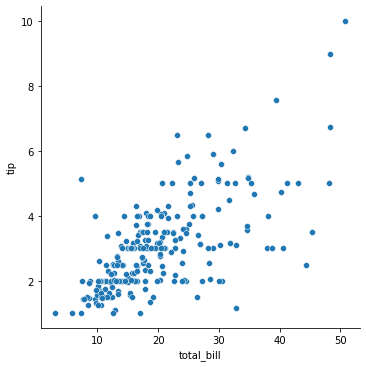

In [4]:
# the relationship of tips (x-axis) are correlated with total bills (y-axis)
sns.relplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

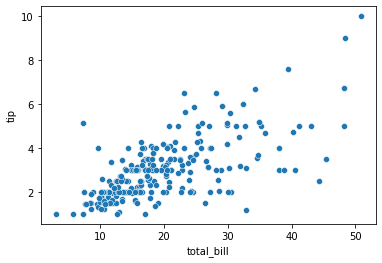

In [12]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

In [ ]:
# The scatterplot() is the default kind in relplot() 
# (it can also be forced by setting kind="scatter")

In [60]:
tips_1=tips[['total_bill','tip','smoker']].groupby(['smoker']).count()
tips_1

,total_bill,tip
smoker,,
Yes,93,93
No,151,151


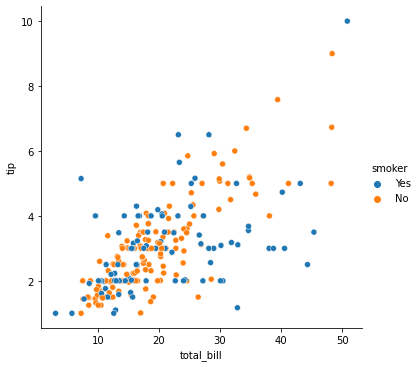

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

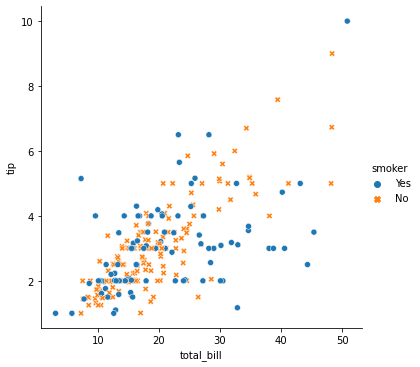

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

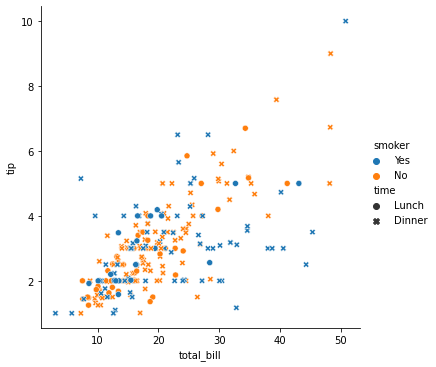

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

###### Another examples

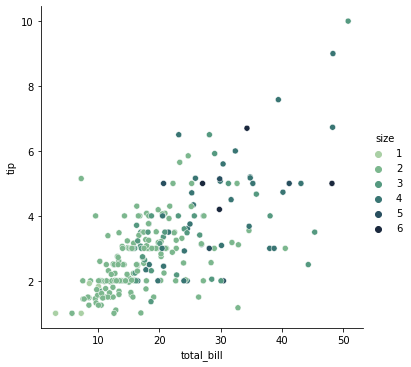

In [14]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips)

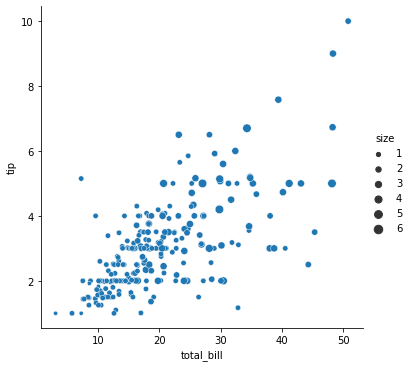

In [10]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

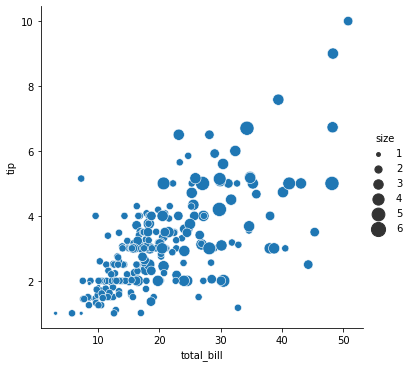

In [11]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

### line plots lineplot() (with kind="line")

In [15]:
df = pd.DataFrame(dict(time=np.arange(500),value=np.random.randn(500).cumsum()))

In [16]:
df.head(10)

,time,value
0,0,0.253228
1,1,-0.580231
2,2,-0.228578
3,3,-1.079383
4,4,-1.151581
5,5,-2.471687
6,6,-1.822368
7,7,-1.226818
8,8,-2.691484
9,9,-5.230740


In [36]:
sns.lineplot(x="time", y="value", data=df)

ValueError: Could not interpret value `time` for parameter `x`

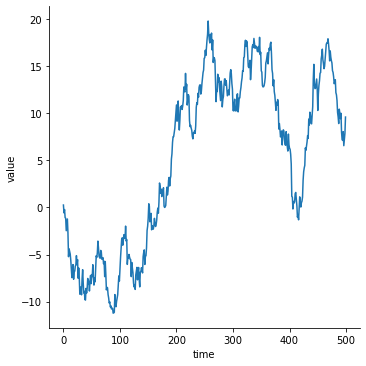

In [17]:
g = sns.relplot(x="time", y="value", kind="line", data=df)

In [18]:
g.fig.autofmt_xdate()

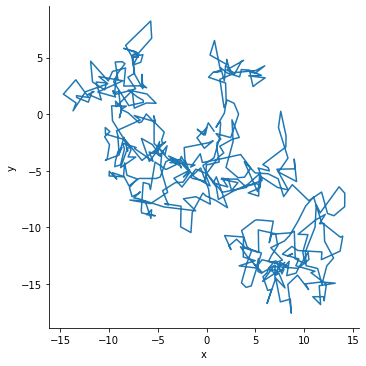

In [19]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df)

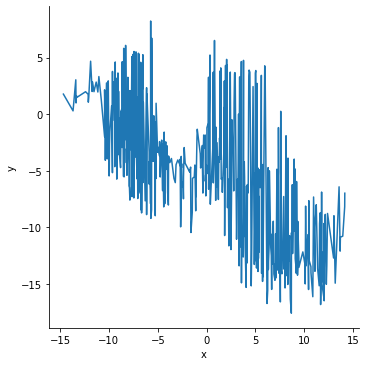

In [21]:
sns.relplot(x="x", y="y", sort=True, kind="line", data=df)

##### Aggregation and representing uncertainty

In [ ]:
# for multiple measurement
# The default behavior in seaborn is to aggregate the multiple measurements

In [22]:
fmri = sns.load_dataset("fmri")

In [23]:
fmri.head(10)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557


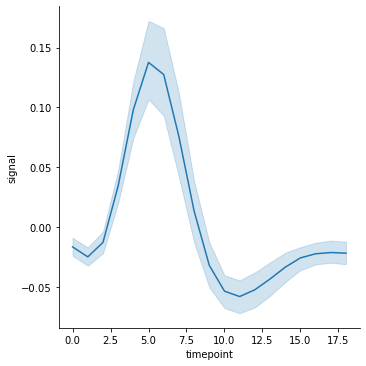

In [24]:
# aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)
# The confidence intervals are computed using bootstrapping

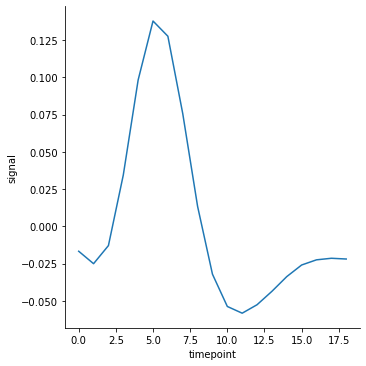

In [25]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

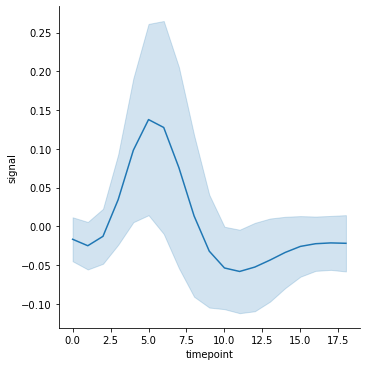

In [29]:
# multiple measurements at each x value by plotting the mean and the standard deviation
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

In [ ]:
# To turn off aggregation altogether, set the estimator parameter to None

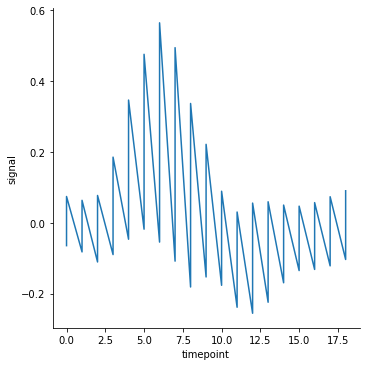

In [30]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri)
# meaningless

## Visualizing distributions of data

In [ ]:
# Plotting univariate histograms

In [37]:
penguins = sns.load_dataset("penguins")

In [38]:
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


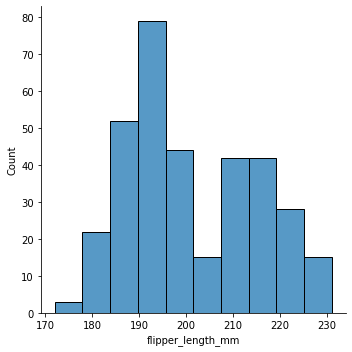

In [39]:
sns.displot(penguins, x="flipper_length_mm")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

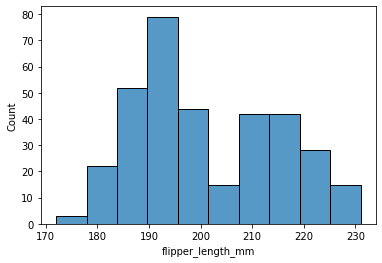

In [40]:
sns.histplot(penguins, x="flipper_length_mm")

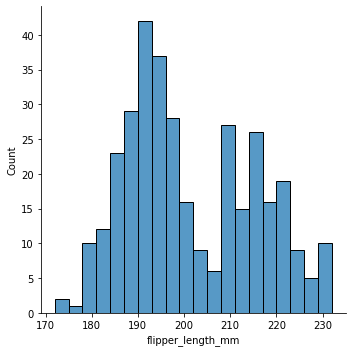

In [62]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

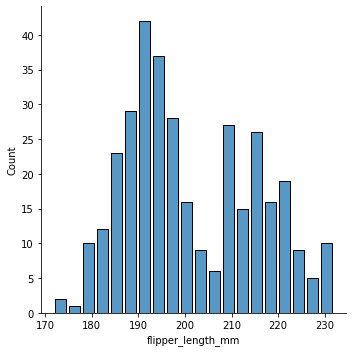

In [63]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3, shrink=.8)

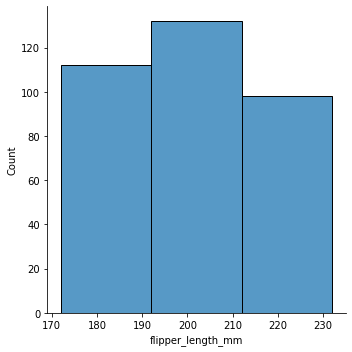

In [42]:
sns.displot(penguins, x="flipper_length_mm", binwidth=20)

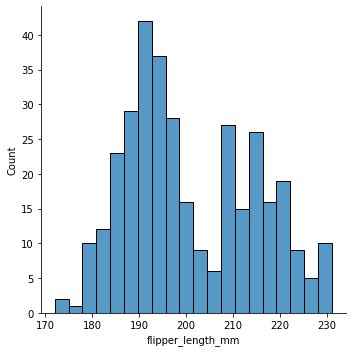

In [43]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

In [ ]:
# Conditioning on other variables

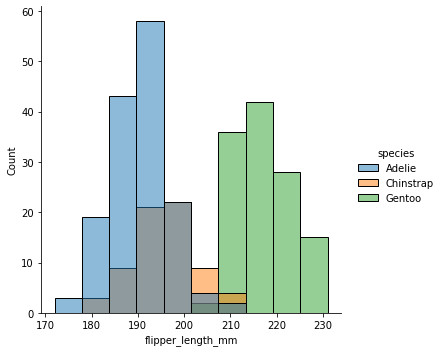

In [61]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

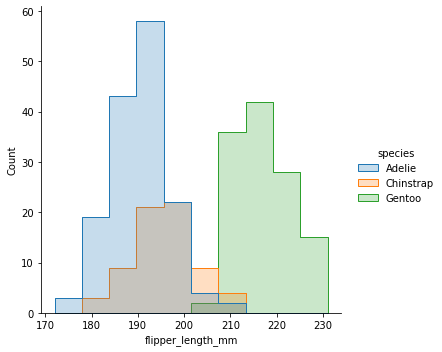

In [64]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

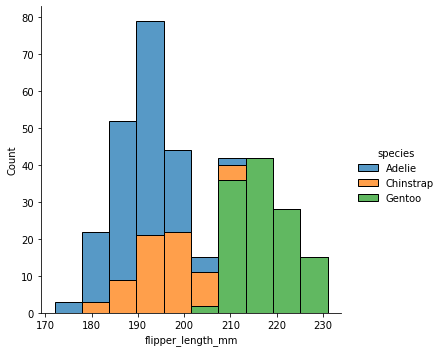

In [65]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

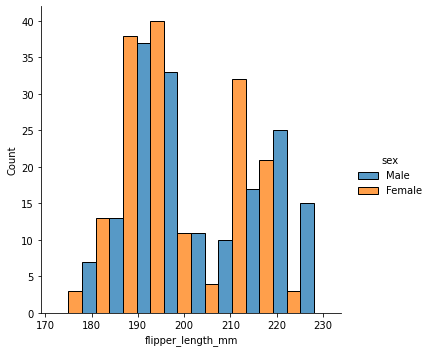

In [66]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

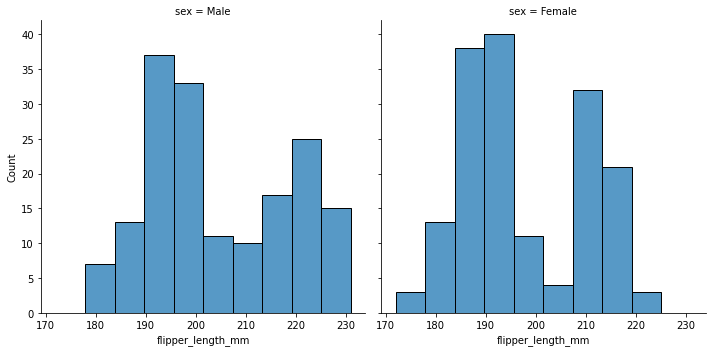

In [67]:
sns.displot(penguins, x="flipper_length_mm", col="sex", multiple="dodge")

In [ ]:
## Normalized histogram statistics --skip

In [ ]:
# Kernel density estimation

In [99]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


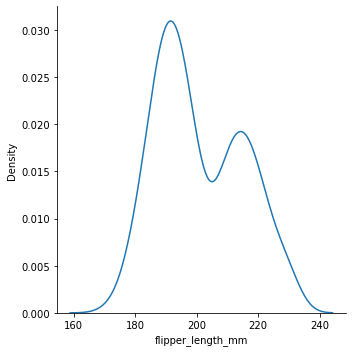

In [68]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

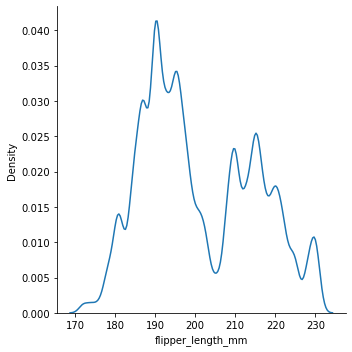

In [69]:
# Choosing the smoothing bandwidth
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

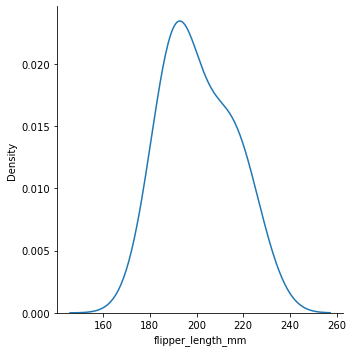

In [70]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

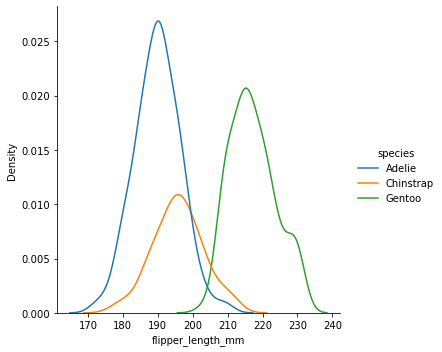

In [71]:
# Conditioning on other variables
# hue="xxx"
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

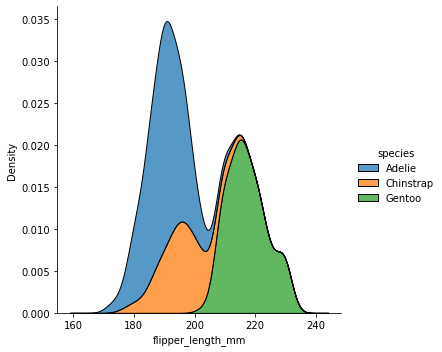

In [72]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

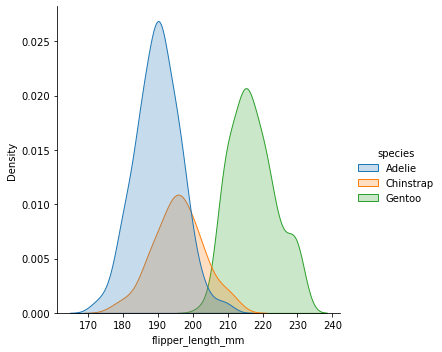

In [73]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

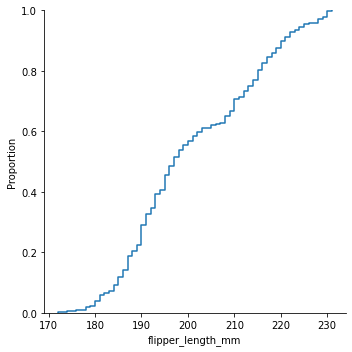

In [74]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

In [ ]:
## Visualizing bivariate distributions
# A bivariate histogram bins the data within rectangles that tile the plot and 
# then shows the count of observations within each rectangle with the fill color 
# (analagous to a heatmap())

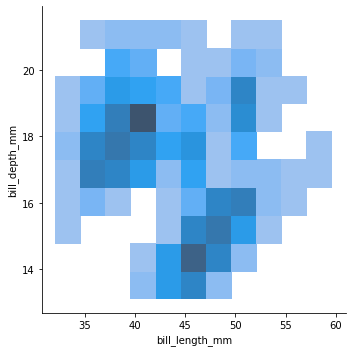

In [75]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

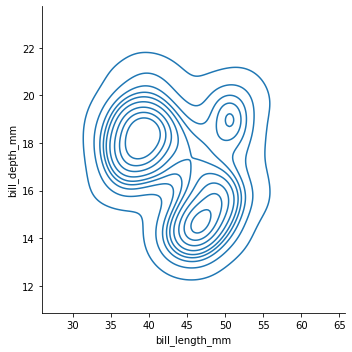

In [76]:
# Similarly, a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian. 
# The default representation then shows the contours of the 2D density
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

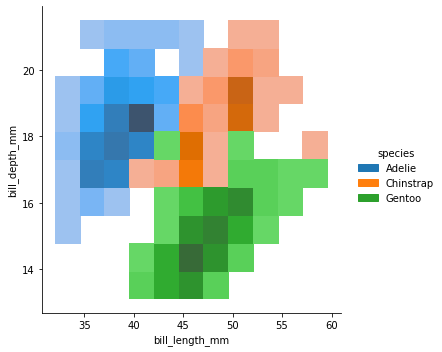

In [77]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

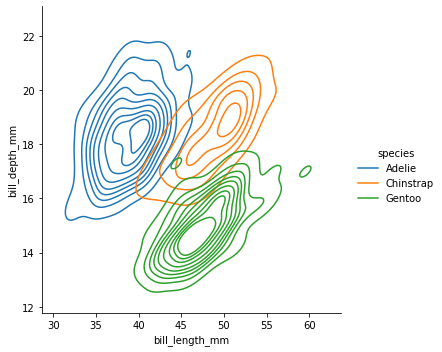

In [78]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

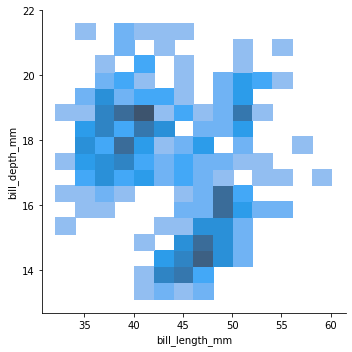

In [79]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5))

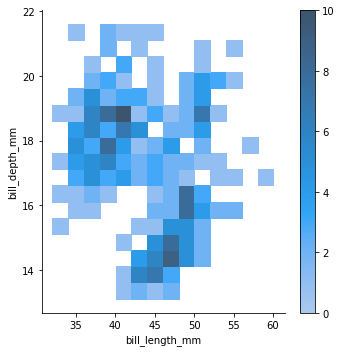

In [80]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

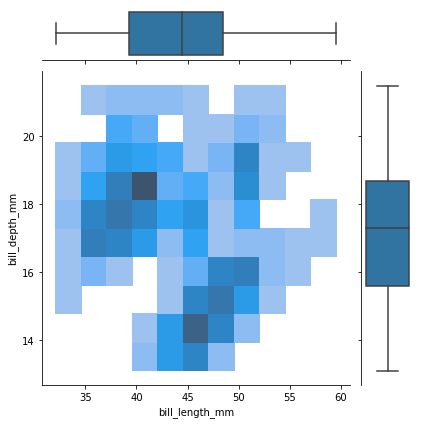

In [81]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

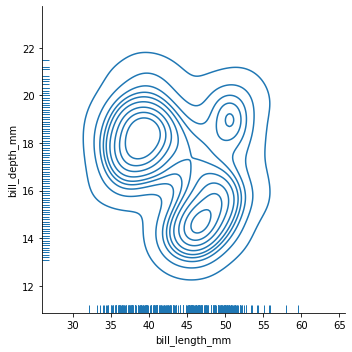

In [82]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

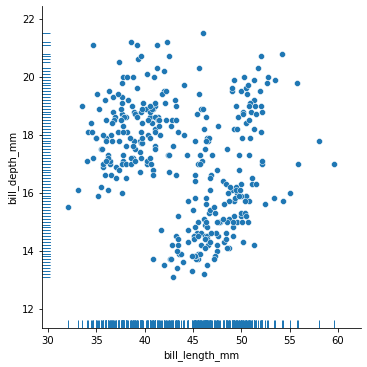

In [83]:
# the axes-level rugplot() function can be used to add rugs on the side of any other kind of plot:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

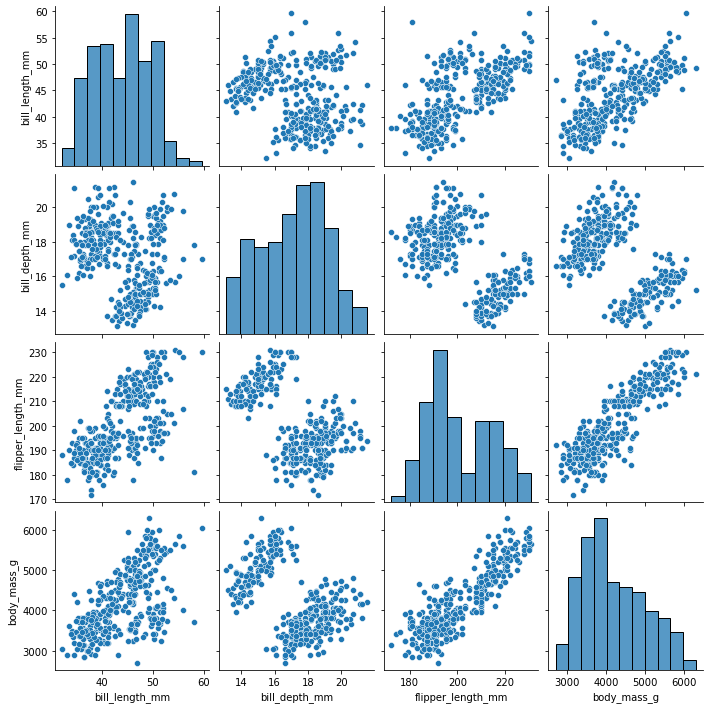

In [84]:
sns.pairplot(penguins)

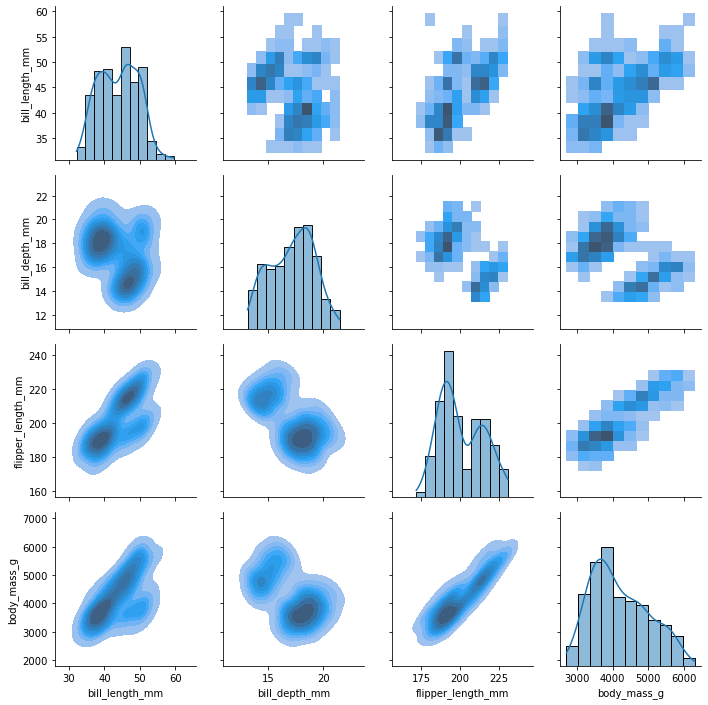

In [85]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [ ]:
# Visualizing regression models

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

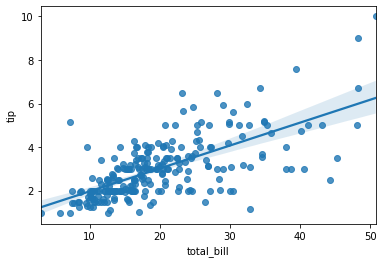

In [86]:
# fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:
sns.regplot(x="total_bill", y="tip", data=tips)

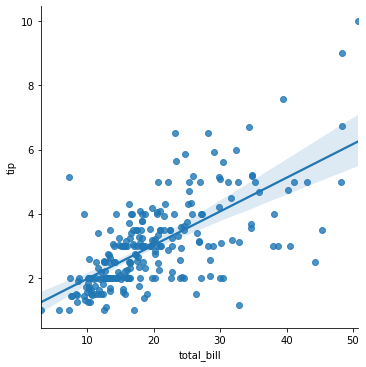

In [87]:
sns.lmplot(x="total_bill", y="tip", data=tips)

In [88]:
anscombe = sns.load_dataset("anscombe")

In [89]:
anscombe.head(10)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


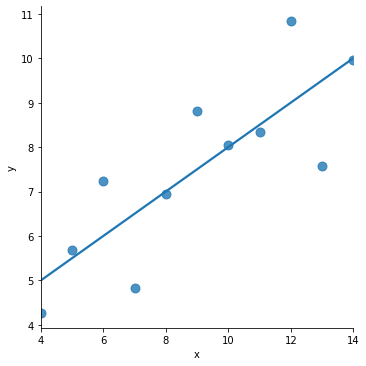

In [90]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80})

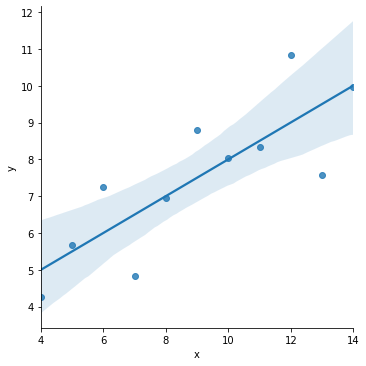

In [92]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"))

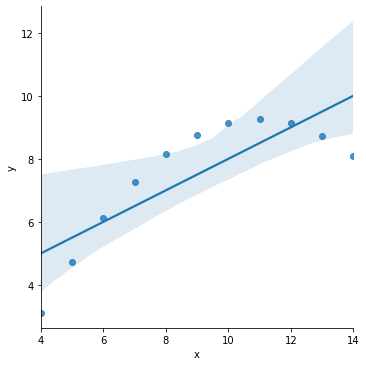

In [94]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"))

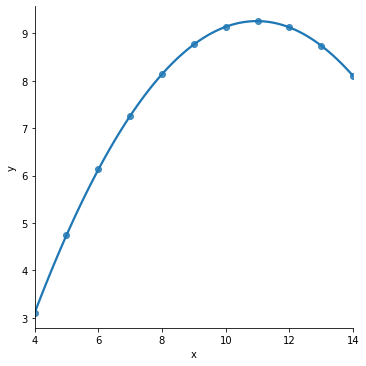

In [95]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2)

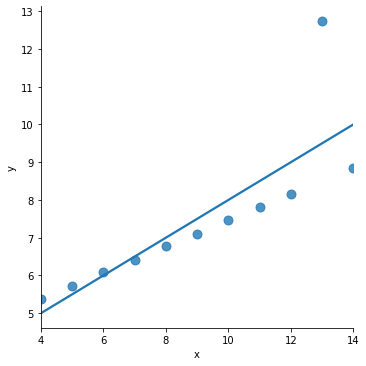

In [96]:
# outliners of observation
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80})

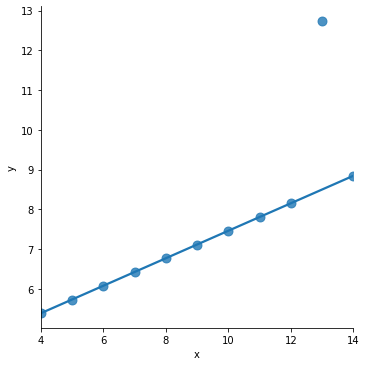

In [97]:
# In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

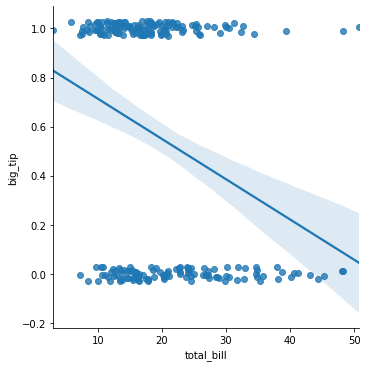

In [98]:
# Advanced
# provide real predictions
# add logistic regression here, fit binary variables
# can explore but won't use in daily work due to sufficient of stat knowledge
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03)